<a class="anchor" id="0"></a>
# **Naive Bayes Classifier in Python**


# **Import libraries** <a class="anchor" id="5"></a>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Import dataset** <a class="anchor" id="6"></a>

In [3]:
data = 'titanic.csv'

df = pd.read_csv(data, header=None, sep=',')

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [ ]:
# Check for missing values
df.isnull().sum()

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S


# **Exploratory data analysis** <a class="anchor" id="7"></a>


In [4]:
df.shape

(892, 12)

We can see that there are 891 instances and 12 attributes in the data set.

### View summary of dataset

In [5]:
# view summary of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       892 non-null    object
 1   1       891 non-null    object
 2   2       892 non-null    object
 3   3       892 non-null    object
 4   4       891 non-null    object
 5   5       715 non-null    object
 6   6       892 non-null    object
 7   7       892 non-null    object
 8   8       892 non-null    object
 9   9       891 non-null    object
 10  10      205 non-null    object
 11  11      889 non-null    object
dtypes: object(12)
memory usage: 83.8+ KB


### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.


First of all, I will explore categorical variables.

# **Data Preprocessing** <a class="anchor" id="10"></a>

### **Explore problems within categorical variables**

### Explore categorical variables

In [10]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 12 categorical variables

The categorical variables are :

 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]




### Missing values in categorical variables

In [11]:
# check missing values in categorical variables
df[categorical].isnull().sum()


0       0
1       1
2       0
3       0
4       1
5     177
6       0
7       0
8       0
9       1
10    687
11      3
dtype: int64

### Handle missing values in categorical variables

In [12]:
# Fill missing values in categorical variables
for var in categorical:
    df[var].fillna(df[var].mode()[0], inplace=True)

/tmp/ipykernel_19517/3408483909.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(df[var].mode()[0], inplace=True)


### **Explore problems within numerical variables**
## Find numerical variables

In [13]:
# Find numerical variables
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 0 numerical variables

The numerical variables are :

 []


### Missing values in Numerical Variables

In [14]:
# Fill missing values in numerical variables
for var in numerical:
    df[var].fillna(df[var].median(), inplace=True)

In [15]:
# Handle missing values in numerical variables
for var in numerical:
    df[var].fillna(df[var].median(), inplace=True)

### Handle missing values in numerical variables

### Check outliers for numerical variables

In [16]:
def out_iqr(df , column):
    global lower,upper
    q1, q3 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q3 - q1
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q1 - cut_off, q3 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [21]:
# Check for outliers using IQR
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Example usage
# Check if 'Fare' column exists in the DataFrame
if 'Fare' not in df.columns:
    print("Column 'Fare' not found in the dataset. Available columns are:")
    print(df.columns)

# If 'Fare' column exists, proceed with outlier detection
if 'Fare' in df.columns:
    outliers = detect_outliers_iqr(df, 'Fare')
    print(outliers)

Column 'Fare' not found in the dataset. Available columns are:
Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')


The IQR is 1.0
The lower bound value is -1.5
The upper bound value is 2.5
Total number of outliers are 0


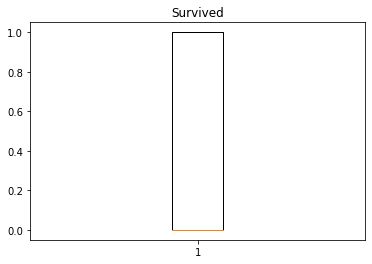

The IQR is 1.0
The lower bound value is 0.5
The upper bound value is 4.5
Total number of outliers are 0


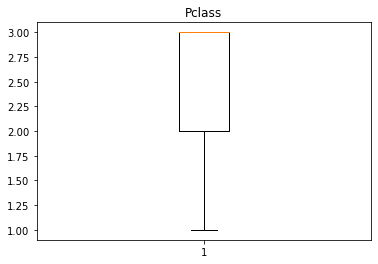

The IQR is 13.0
The lower bound value is 2.5
The upper bound value is 54.5
Total number of outliers are 64


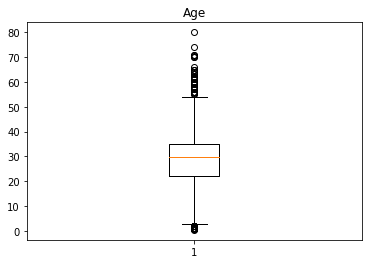

The IQR is 1.0
The lower bound value is -1.5
The upper bound value is 2.5
Total number of outliers are 46


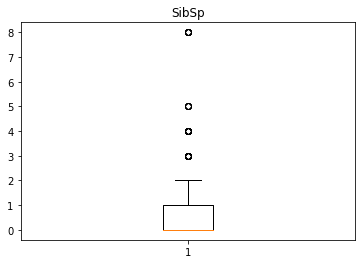

The IQR is 0.0
The lower bound value is 0.0
The upper bound value is 0.0
Total number of outliers are 212


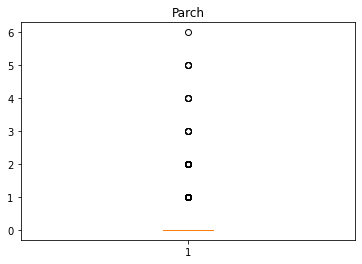

The IQR is 23.1042
The lower bound value is -26.7605
The upper bound value is 65.6563
Total number of outliers are 114


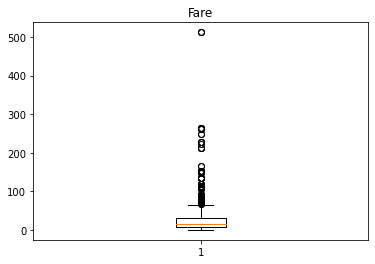

### **Methods to Handle the outliers**
**Trimming :** trimming simply means removing the outliers and get rid of it. but this technique is not much useful because we can loose some useful information by doing so.


**Censoring(Capping) :** It means setting the variable distribution at maximum and minimum values.

# **Feature Engineering** #
**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

### Encode categorical variables

In [ ]:
# print categorical variables



['Gender', 'Ticket', 'Embarked']

In [23]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in categorical:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender_male,Ticket_110413,Ticket_110465,Ticket_110564,...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1.0,38.0,1.0,0.0,77.2875,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,35.0,1.0,0.0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,3.0,35.0,0.0,0.0,8.0500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# **Declare feature vector and target variable** <a class="anchor" id="8"></a>


In [24]:
x = df.drop(['Survived'], axis=1)

y = df['Survived']

KeyError: "['Survived'] not found in axis"

# **Split data into separate training and test set** <a class="anchor" id="9"></a>

In [25]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

NameError: name 'x' is not defined

In [ ]:
# check the shape of X_train and X_test
x_train.shape, x_test.shape

((619, 684), (266, 684))

# **Feature Scaling** <a class="anchor" id="11"></a>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

,Pclass,Age,SibSp,Parch,Fare,Gender_male,Ticket_110413,Ticket_110465,Ticket_110564,Ticket_110813,...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
328,1.0,0.549020,0.5,1.0,0.265567,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
801,0.5,0.549020,0.5,1.0,0.339641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
95,1.0,0.523512,0.0,0.0,0.104157,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
835,0.0,0.705882,0.5,1.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
186,1.0,0.523512,0.5,0.0,0.200550,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1.0,0.225490,0.5,0.0,0.187019,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,0.0,0.862745,0.5,0.0,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
866,0.5,0.470588,0.5,0.0,0.179308,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,0.5,0.823529,0.5,1.0,0.339641,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Apply MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Model training** <a class="anchor" id="12"></a>

In [ ]:
# Train a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train_scaled, y_train)

# **Predict the results** <a class="anchor" id="13"></a>

In [ ]:
# Make predictions
y_pred = classifier.predict(x_test_scaled)

In [ ]:
# Make predictions
y_pred = classifier.predict(x_test_scaled)

# **Check accuracy score** <a class="anchor" id="14"></a>

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# **Confusion matrix** <a class="anchor" id="15"></a>


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [22]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

NameError: name 'y_test' is not defined

In [ ]:
# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()